2.MNISTデータセット

ニューラルネットワークスクラッチの検証にはMNISTデータセットを使用します。各種ライブラリやサイトからダウンロードできますが、ここでは深層学習フレームワークのKerasを用います。以下のコードを実行すればデータセットをダウンロードし、展開まで行えます。



In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [83]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

《MNISTとは？》


画像分類のための定番データセットで、手書き数字認識を行います。このデータセットには訓練用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかというラベルが含まれています。


《画像データとは？》


デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。

### データセットの確認
どういったデータなのかを見てみます。
各データは28×28ピクセルの白黒画像です。

In [84]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(y_train.shape)
print(y_test.shape)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   

### 平滑化
(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。全てのピクセルが一列になっていることを、 平滑化（flatten） してあるという風に表現します。
ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。さらに、もしもカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。



In [85]:
X_train = X_train.reshape(-1 , 784)
X_test = X_test.reshape(-1 , 784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### 画像データの可視化
画像データを可視化します。plt.imshowに渡します。



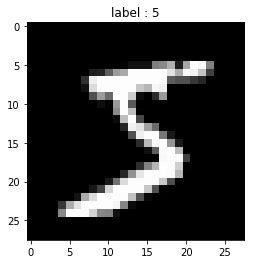

In [86]:
index = 0
image = X_train[index].reshape(28 , 28)
#X_train[index] : (784,)
#image : (28,28)
plt.imshow(image , "gray")
plt.title("label : {}".format(y_train[index]))
plt.show()

《発展的話題》


画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、plt.imshowはより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。

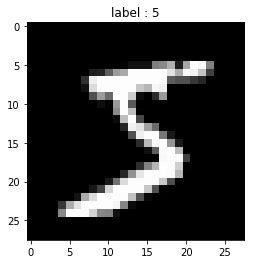

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [87]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float)#float型に変換
image -= 105.35 #意図的に負の小数値を作り出してみる
plt.imshow(image , "gray")
plt.title("label : {}".format(y_train[index]))
plt.show()
print(image)#値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。
画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。



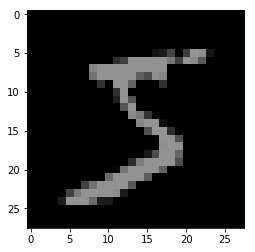

In [88]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

### 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。

In [89]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max())#1.0
print(X_train.min())#0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には one-hot表現 に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います

In [90]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


さらに、訓練データ6万枚の内2割を検証データとして分割してください。訓練データが48000枚、検証データが12000枚となります。

In [91]:
from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(
             X_train , y_train_one_hot , test_size = 0.20)
print(X_train.shape)
print(X_val.shape)

(48000, 784)
(12000, 784)


## 3.ニューラルネットワークスクラッチ

ニューラルネットワークのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


今回は多クラス分類を行う3層のニューラルネットワークを作成します。層の数などは固定した上でニューラルネットワークの基本を学びます。次のSprintで層を自由に変えられる設計にしていきます。


以下に雛形を用意してあります。このScratchSimpleNeuralNetrowkClassifierクラスにコードを書き加えていってください。

ニューラルネットワークのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


今回は多クラス分類を行う3層のニューラルネットワークを作成します。層の数などは固定した上でニューラルネットワークの基本を学びます。次のSprintで層を自由に変えられる設計にしていきます。


以下に雛形を用意してあります。このScratchSimpleNeuralNetrowkClassifierクラスにコードを書き加えていってください。

In [92]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, verbose = True):
        self.verbose = verbose
        pass

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """

        pass
        return

ミニバッチ処理
これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する 確率的勾配降下法 が一般的です。分割した際のひとかたまりを ミニバッチ 、そのサンプル数を バッチサイズ と呼びます。

今回はバッチサイズを20とします。今回使う訓練用データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回 イテレーション（iteration） すると呼びます。訓練用データを一度全て見ると1回の エポック（epoch） が終わったことになります。このエポックを複数回繰り返し、学習が完了します。

これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

In [93]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練用データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [94]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass
    

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0

## 学習
ニューラルネットワークの学習はフォワードプロパゲーションとバックプロパゲションの繰り返しになります。


### 【問題1】重みの初期値を決めるコードの作成

ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。


重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。


以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

In [49]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)

In [50]:
batch_size = 20 # バッチサイズ
n_features = X_train.shape[1] # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）

In [95]:
W1.shape

(784, 400)

In [96]:
X_train.shape

(48000, 784)

In [97]:
X_test.shape

(10000, 784)

In [98]:
def initial_value(n_features , n_nodes1,n_nodes2, n_output , sigma):
    W1 = sigma * np.random.rand(n_features , n_nodes1)#一層目の重み
    W2 = sigma * np.random.rand(n_nodes1 , n_nodes2)#二層目の重み
    W_out = sigma * np.random.rand(n_nodes2 , n_output)#出力層の重み
    b1 = np.zeros(n_nodes1)#一層目のバイアス
    b2 = np.zeros(n_nodes2)#二層目のバイアス
    b_out = np.zeros(n_output)#出力層のバイアス
    return W1,W2,W_out,b1,b2,b_out

### 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。


各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

In [99]:
#それぞれの重みとバイアスを取得
W1 , W2 , W_out , b1 , b2 , b_out = initial_value(n_features , n_nodes1,n_nodes2, n_output , sigma)

In [100]:
train_size = X_train.shape[1]
mask =  np.random.choice(train_size , batch_size)
X_batch = X_train[mask]
A1 = np.dot(X_batch , W1) + b1
A1.shape

(20, 400)

In [101]:
Z_1 = 1 / (1 + np.exp(-A1))

In [102]:
Z1 = np.tanh(A1)

In [103]:
Z1.shape

(20, 400)

In [104]:
X_train.shape

(48000, 784)

In [105]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

# print(len(get_mini_batch)) # 2400
# print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    A1 = np.dot(mini_X_train , W1) + b1
    Z1 = np.tanh(A1)
    A2 = np.dot(Z1 , W2) + b2
    Z2 = np.tanh(A2)
    A3 = np.dot(Z2 , W_out) + b_out
    Z3 = Z = np.exp(A3) / np.sum(np.exp(A3))
#     print(Z3.shape)

In [106]:
Z = np.exp(A1[-1]) / np.sum(np.exp(A1))

In [107]:
Z.shape

(400,)

In [108]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [109]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp = np.sum(exp_a)
    z = exp_a / sum_exp
    return z#「2層目の活性化関数」
Z2 = np.tanh(A2) 

### 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。


多クラス分類の目的関数である交差エントロピー誤差 
L
 は次の数式です。
 $$
 L = - \frac{1}{n_b}\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk} log(z_{3\_jk})
$$
y
i
j
 : 
j
 番目のサンプルの 
k
 番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）


z
3
i
j
 : 
j
 番目のサンプルの 
k
 番目のクラスの確率（スカラー）


n
b
 : バッチサイズ、batch_size


n
c
 : クラスの数、n_output（今回のMNISTでは10）


サンプル1つあたりの誤差が求まります。

In [110]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)

# print(len(get_mini_batch)) # 2400
# print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    A1 = np.dot(mini_X_train , W1) + b1
    Z1 = np.tanh(A1)
    A2 = np.dot(Z1 , W2) + b2
    Z2 = np.tanh(A2)
    A3 = np.dot(Z2 , W_out) + b_out
    Z3 = Z = np.exp(A3) / np.sum(np.exp(A3))
    L = -np.sum(mini_y_train * np.log(Z3)) / batch_size

In [111]:
def cross_entropy_error(y , z):
    if y.ndim == 1: #次元数が１ならば、
        z = z.reshape(1 , z.size)
        y = y.reshape(1 , y.size)

    error = -np.sum(y[np.arange(batch_size)] * np.log(z) + 1e-7) / batch_size 
    return error

In [112]:
cross_entropy_error(y_train_one_hot, Z3)

5.303584499813843


【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。


数式を以下に示します。


まず、i層目の重みとバイアスの更新式です。 
W
i
 と 
B
i
 に対し、更新後の 
W
′
i
 と 
B
′
i
 は次の数式で求められます。

$$
W_i^{\prime} = W_i - \alpha \frac{\partial L}{\partial W_i} \\<br/>B_i^{\prime} = B_i - \alpha \frac{\partial L}{\partial B_i}
$$

α
 : 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）


∂
L
∂
W
i
 : 
W
i
 に関する損失 
L
 の勾配


∂
L
∂
B
i
 : 
B
i
 に関する損失 
L
 の勾配


＊この勾配はミニバッチのサンプル数分の合計または平均を考えます。ここでは合計を計算します。


この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。より効果的な更新方法が知られており、それは次のSprintで扱います。


勾配 
∂
L
∂
W
i
 や 
∂
L
∂
B
i
 を求めるために、バックプロパゲーションを行います。以下の数式です。ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。

In [113]:
def sigmoid_derivative(x):
    y = (1 - sigmoid(x)) * sigmoid(x)
    return y

In [114]:
sigmoid_derivative(A1)

array([[0.24094791, 0.24015754, 0.24079708, ..., 0.24031549, 0.24036075,
        0.24217076],
       [0.22724787, 0.22848289, 0.2307437 , ..., 0.22875329, 0.22924105,
        0.23114128],
       [0.24705421, 0.24658244, 0.24598613, ..., 0.24621749, 0.24723803,
        0.24650248],
       ...,
       [0.24778682, 0.24738832, 0.24773734, ..., 0.24691016, 0.24796639,
        0.24717019],
       [0.20865019, 0.21127571, 0.20735096, ..., 0.20432098, 0.21431736,
        0.20971367],
       [0.21949371, 0.22254102, 0.21965678, ..., 0.21940144, 0.22057351,
        0.22416662]])

「3層目」
$$
\frac{\partial L}{\partial A_3} = Z_{3} - Y\\<br/>\frac{\partial L}{\partial B_3} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{3\_j}}\\<br/>\frac{\partial L}{\partial W_3} = Z_{2}^{T}\cdot \frac{\partial L}{\partial A_3}\\<br/>\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T
$$

「2層目」
$$
\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot \{1-tanh^2(A_{2})\}\\<br/>\frac{\partial L}{\partial B_2} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{2\_j}}\\<br/>\frac{\partial L}{\partial W_2} = Z_{1}^T \cdot \frac{\partial L}{\partial A_2}\\<br/>\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T
$$

「1層目」
$$
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot \{1-tanh^2(A_{1})\}\\<br/>\frac{\partial L}{\partial B_1} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{1\_j}}\\<br/>\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1}\\
$$

In [121]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self , epochs = 10 , alpha = 0.001 ,sigma = 0.01,n_nodes1= 400 , n_nodes2 = 200 , n_output = 10 , batch_size = 20, verbose = True):
        self.verbose = verbose
        self.sigma = sigma
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        n_features = X_train.shape[1]
        self.n_features = n_features
        self.batch_size = batch_size
        self.alpha = alpha
        self.loss = []
        self.epochs = epochs
     
    #初期値
    def init_network(self):
        network = {}
        network["W1"] =  self.sigma * np.random.randn(self.n_features , self.n_nodes1)#一層目の重み
        network["b1"] = self.sigma * np.random.randn(self.n_nodes1)
        network["W2"] = self.sigma * np.random.randn(self.n_nodes1 , self.n_nodes2)#二層目の重み
        network["b2"] = self.sigma * np.random.randn(self.n_nodes2)
        network["W_out"] = self.sigma * np.random.randn(self.n_nodes2 , self.n_output)#出力層の重み
        network["b_out"] =  self.sigma * np.random.randn(self.n_output)
        return network
    
    #活性化関数(シグモイド関数)
    def _sigmoid(self , a):
        c = np.max(a)
        a = a / c
        return 1 / (1 + np.exp(-a))
    
    #活性化関数の微分
    def _sigmoid_derivative(self, a):
        c = np.max(a)
        a = a / c
        return (1 - self._sigmoid(a)) * self._sigmoid(a)
    
    #ソフトマックス関数
#     def _softmax(self , a):
#         c = np.max(a)
#         exp_a = self._sigmoid(a / c)
#         sum_exp = np.sum(exp_a)
#         z = exp_a / sum_exp
#         return z
    def _softmax(self , x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T
        x = x - np.max(x)
        return np.exp(x) / np.sum(np.exp(x))
    
    #フォワードプロバゲーション
    def _forward(self ,  X):
#         self.get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
#         for self.mini_X_train, self.mini_y_train in self.get_mini_batch:
        self.A1 = np.dot(X , self.W1) + self.b1
        self.Z1 = self._sigmoid(self.A1)
        self.A2 = np.dot(self.Z1 , self.W2) + self.b2
        self.Z2 = self._sigmoid(self.A2)
        self.A_out = np.dot(self.Z2 , self.W_out) + self.b_out
        self.Z_out = self._softmax(self.A_out)
        return self.A1,self.A2,self.A_out,self.Z1,self.Z2,self.Z_out

    
    def _gradient(self , y):
        #三層目
        delta_3 = self.z_out - y
        LB_3 = np.sum(delta_3 , axis = 0)
        WL_3 = np.dot(self.z2.T , delta_3)
        ZL_2 = np.dot(delta_3 , self.W_out.T)
        self.W_out -= self.alpha * WL_3
        self.b_out -= self.alpha * LB_3
        
        #二層目
        delta_2 = ZL_2 * self._sigmoid_derivative(self.a2)
        LB_2 = np.sum(delta_2 , axis = 0)
        WL_2 = np.dot(self.z1.T , delta_2)
        ZL_1 = np.dot(delta_2 , self.W2.T)
        self.W2 -= self.alpha * WL_2
        self.b2 -= self.alpha * LB_2
        
        #一層目
        delta_1 = ZL_1 * self._sigmoid_derivative(self.a1)
        LB_1 = np.sum(delta_1 , axis = 0)
        WL_1 = np.dot(self.mini_X_train.T , delta_1)
        self.W1 -= self.alpha * WL_1
        self.b1 -= self.alpha * LB_1
#         print("ssss" ,  np.unique(self.W1))
        return self.W1 , self.W2,self.W_out,self.b1,self.b2,self.b_out
        
    #交差エントロピー    
    def _cross_entropy_error(self , y):
#         if y.ndim == 1: #次元数が１ならば、
#             z = z.reshape(1 , self.z.size)
#             y = y.reshape(1 , y.size)
#         print("sssss",self.z_out[:10,:])
        loss = -np.sum(y * np.log(self.z_out) + 1e-7) / self.batch_size
        return loss
        
    

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        np.random.seed(1)
        self.network = self.init_network()
        self.W1 , self.W2 , self.W_out = self.network["W1"] , self.network["W2"] , self.network["W_out"]
        self.b1 , self.b2 , self.b_out = self.network["b1"] , self.network["b2"] , self.network["b_out"]
        
        for i in range(self.epochs):
            self.get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
            for self.mini_X_train, self.mini_y_train in self.get_mini_batch:
            # forward propagation
                self.a1,self.a2,self.a_out,self.z1,self.z2,self.z_out = self._forward(self.mini_X_train)
                self._grad = self._gradient(self.mini_y_train)
                self.c_loss = self._cross_entropy_error(self.mini_y_train)
            self.loss = np.append(self.loss , self.c_loss)
        
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print(self.W1)

    def _predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        self.a1,self.a2,self.a_out,self.z1,self.z2,self.z_out = self._forward(X)
        self.y_pred = np.argmax(self.z_out , axis = 1)
#         print(self.a2.shape)
#         print(self.y_pred.shape)
        return self.y_pred
    
    def accuracy(self , X , t):
#         print("y" , y.shape)
#         y = np.argmax(y , axis = 0)
        y_pred = self._predict(X)
#         print(y_pred[:10])

#         print("t" , t[:10])
        return np.sum(y_pred == t) / float(X.shape[0])

In [122]:
nn = ScratchSimpleNeuralNetrowkClassifier(epochs = 30 , alpha = 1e-3)

In [123]:
nn.fit(X_train , y_train)

[[ 1.62434536e-02 -6.11756414e-03 -5.28171752e-03 ...  9.20615118e-03
  -3.53679249e-04  2.11060505e-02]
 [-1.30653407e-02  7.63804802e-04  3.67231814e-03 ... -7.02920403e-03
   7.25550518e-03 -3.24204219e-03]
 [ 8.14343129e-03  7.80469930e-03 -1.46405357e-02 ... -1.44899155e-02
   7.79491866e-03 -1.08630091e-02]
 ...
 [ 1.60384584e-02  1.96976176e-02 -2.33649423e-03 ... -6.45457222e-03
  -1.15880376e-02 -3.21516920e-03]
 [ 2.76095121e-03  3.41037846e-03  3.13167564e-03 ...  2.13189768e-02
  -8.48780698e-03 -7.04500003e-03]
 [-1.40223899e-02  3.60829187e-03 -3.59655397e-04 ... -1.01501808e-02
   2.21528645e-02 -7.85133601e-05]]


### 【問題5】推定
推定を行うメソッドを作成してください。


フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。

In [126]:
nn = ScratchSimpleNeuralNetrowkClassifier(epochs =10 , alpha = 1e-3)

In [127]:
nn.fit(X_train , y_train)

[[ 1.62434536e-02 -6.11756414e-03 -5.28171752e-03 ...  9.20615118e-03
  -3.53679249e-04  2.11060505e-02]
 [-1.30653407e-02  7.63804802e-04  3.67231814e-03 ... -7.02920403e-03
   7.25550518e-03 -3.24204219e-03]
 [ 8.14343129e-03  7.80469930e-03 -1.46405357e-02 ... -1.44899155e-02
   7.79491866e-03 -1.08630091e-02]
 ...
 [ 1.60384584e-02  1.96976176e-02 -2.33649423e-03 ... -6.45457222e-03
  -1.15880376e-02 -3.21516920e-03]
 [ 2.76095121e-03  3.41037846e-03  3.13167564e-03 ...  2.13189768e-02
  -8.48780698e-03 -7.04500003e-03]
 [-1.40223899e-02  3.60829187e-03 -3.59655397e-04 ... -1.01501808e-02
   2.21528645e-02 -7.85133601e-05]]


In [128]:
nn._predict(X_train)

array([1, 1, 6, ..., 7, 7, 4])

In [129]:
nn._predict(X_test)

array([7, 2, 1, ..., 9, 8, 6])

### 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [130]:
nn.accuracy(X_test , y_test)

0.6389

In [131]:
np.argmax(y_train , axis = 1)#np.argmaxは最大値のindexを返す関数

array([1, 1, 6, ..., 7, 7, 4])

【問題7】学習曲線のプロット

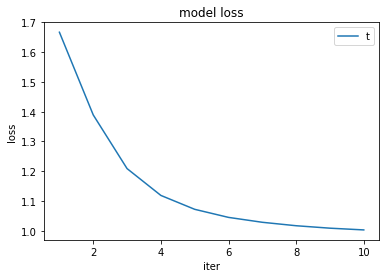

In [132]:
plt.plot(np.arange(1 , len(nn.loss) + 1) , nn.loss , label = "loss")
# plt.plot(np.arange(1 , len(slr.val_loss) + 1) , slr.val_loss , label = "test_loss")
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")
plt.legend("train_loss")
plt.show()

In [133]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)